# LAB-2: Project Air Quality - Modelling

Welcome to the second lab session of the Air Quality Project. In this lab, we will be focusing on the modeling part of the regression problem, using the same dataset as in the previous session.

### General Announcements

* The exercises on this sheet are graded by a maximum of **12 points**. You will be asked to implement several functions.
* Team work is not allowed! Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not. 
* If you use any code fragments found on the Internet, make sure you reference them properly.
* You can send your questions via email to the TAs until the deadline.

### <u>Grading:<u>

[6) Baseline Linear Regression](#LR)  (4 points)

[7) Feature Engineering and testing model](#FE)  (2 points)

[8) Decision Tree Regression ](#DT) (1 point)

[9) Random Forest Regression](#RF) (1 point)

[9.1) Blox plot](#bxplot) (2 points)
    
[10) Support Vector Machine](#SVM) (2 point)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 10, 8

Load the data provided for Lab-1 (Check: http://pandas.pydata.org/pandas-docs/stable/user_guide/io.html):
- Save the pre-processed data at the end of the previous lab's notebook.
- Load the data you saved.

NOTE: You can just copy and paste the cells from the previous notebook. Then, you should re-run all the cells again.

Please check the number of cols/rows of the loaded dataframe. 

In [2]:
df = pd.read_csv('/Users/tunayildiz/MachineLearningforSciences/Labs/lab1_final.csv')
df = df.iloc[:,1:]
df.head()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR,MONTH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,3
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,3
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,3
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,3
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,3


### 6) Linear Regression<a name="LR"></a>

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

- Define Feature (X) and Target (y) (0.5 points)

NOTE: Check the objective of the 1st lab.

In [4]:
# your code
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.loc[:,~df.columns.isin(['RH'])]
y = df['RH']

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (827, 13)
Shape of y: (827,)


- Plot distribution of target variable. (0.5 points)

- Split the data into train and test with test size and 30% and train size as 70%, use a random seed.
- Print the number of train and test samples. (0.5 points)

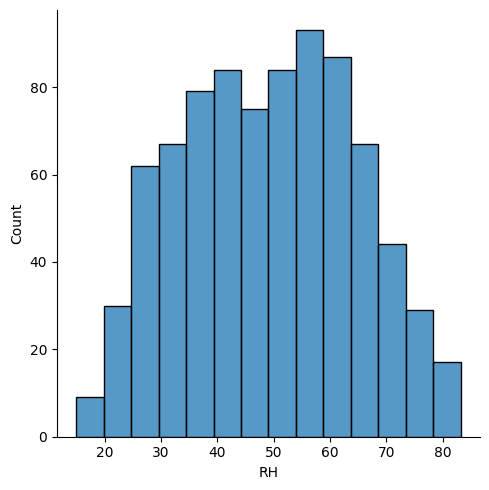

In [5]:
sns.displot(y)

In [6]:
# your code
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Number of train samples: {}'.format(X_train.shape))
print('Number of test samples: {}'.format(X_test.shape))

Number of train samples: (578, 13)
Number of test samples: (249, 13)


- Normalize data using `StandardScaler` (0.5 points)

IMPORTANT: 
- Be careful about which data you are allowed to use for normalization.
- **DO NOT** forget to use the normalization for the different models (SVR etc.) !!

In [7]:
# your code
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))

 - Train the Linear Regression model (0.5 points)
 
 See: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [8]:
# your code
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)

LinearRegression()

- Print intercept and slope of the linear model (0.5 points)

NOTE: There are more than one slopes, print them in a for loop with the corresponding variable name.

In [9]:
# your code
print(f'Intercept: {regressor.intercept_}')
print('\n')
coef = regressor.coef_

df_new = pd.DataFrame(coef, X.columns, columns =['Coef'])
print(df_new)


Intercept: 48.08927335640137


                   Coef
CO_GT         -1.422742
PT08_S1_CO    -1.984194
C6H6_GT       -4.372204
PT08_S2_NMHC   5.558213
NOX_GT         1.390176
PT08_S3_NOX    2.576469
NO2_GT         0.891698
PT08_S4_NO2    2.889766
PT08_S5_O3    -0.705101
T            -12.865663
AH             9.284051
HOUR          -0.457048
MONTH         -0.175087


- Predict on the test data (0.5 points)
- Compute and print performance metrics as RMSE. 

This will be our baseline.

In [10]:
y_pred = regressor.predict(X_test_scaled)
np.set_printoptions(precision=2)
print(y_test.values[0:5], y_pred[0:5])

[66.8 34.1 59.7 45.6 59.1] [64.74 35.43 60.13 47.96 56.93]


In [11]:
# R2 Score
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9637526966525307


In [12]:
print('The baseline RMSE score: ')
# your code
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_linear_reg = sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Score for linear regression: {rmse_linear_reg}')

The baseline RMSE score: 
RMSE Score for linear regression: 2.9139341037283097


- Write a conclusion about the linear regression model. (0.5 points)

ANSWER: ...

### 7) Feature engineering and testing model:<a name="FE"></a>

Try with multiple feature combination and see if RMSE is improving

- Write function to measure RMSE with different combinations of features (1 point)

NOTE: Check the comments of the function.

In [13]:
import random

def train_test_RMSE(df, feat_):    
    """
    The function train_test_RMSE returns the RMSE for different combinations 
    of features feat_ of the dataframe df_air.
    
        :param df_air: (pandas.DataFrame) Our dataset
        :param feat_: (List[str]) A list of column names
        :return: (float) The RMSE score value
    """
    # your code
    from sklearn.linear_model import LinearRegression
    X = df[feat_]
    y = df['RH']
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    rms = sqrt(mean_squared_error(y_test, y_pred))
    return rms

- Train 3 models with different combination of inputs. (0.5 points)
- Try to find the 6 variable combination that gives the best score.

In [14]:
# Trail 1
features = random.choices(X.columns,k=6) # Pick random 6 features 
print(features)
train_test_RMSE(df, features)

['PT08_S1_CO', 'NO2_GT', 'PT08_S5_O3', 'PT08_S2_NMHC', 'CO_GT', 'NOX_GT']


12.7823607449378

In [15]:
# Trail 2
features = random.choices(X.columns,k=6) # Pick random 6 features 
print(features)
train_test_RMSE(df, features)

['AH', 'MONTH', 'T', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC']


3.160281089123786

In [16]:
# Trail 3
features = random.choices(X.columns,k=6) # Pick random 6 features 
print(features)
train_test_RMSE(df, features)

['PT08_S1_CO', 'PT08_S1_CO', 'MONTH', 'PT08_S2_NMHC', 'NO2_GT', 'PT08_S4_NO2']


12.257789177628046

- Comment on the results (0.5 points)

Hint: Is there a relationship between the score and the heatmap in the previous lab? If so, why?

<AxesSubplot: >

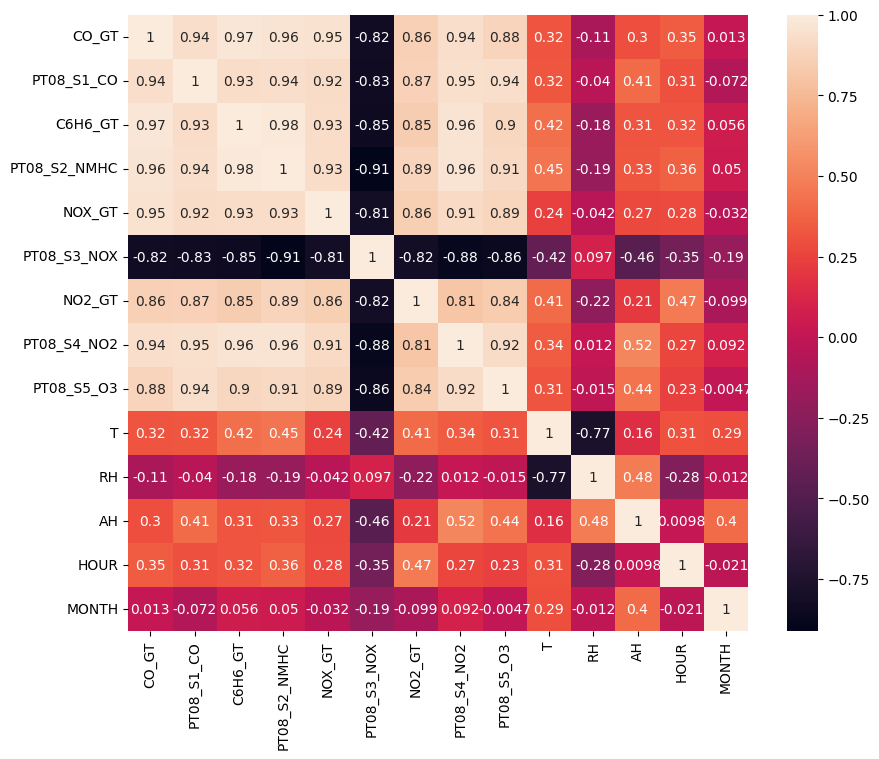

In [17]:
sns.heatmap(df.corr(), annot=True)

In [18]:
features = ['HOUR','AH','T','NO2_GT','PT08_S2_NMHC','C6H6_GT']
train_test_RMSE(df,features)

3.0274081720438

ANSWER: Looking at the correlation heatmap, 6 highest absolute correlation values are used as features to to fit the model and retrieve RMSE. Clearly, the model that uses features with the highest correlation to RH has lower RMSE score compared to the models that picked features randomly from the df.

### 8) Decision Tree Regression<a name="DT"></a>

Let us try to apply Decision tree regression technique and see if any improvement happens

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

- Fit the DT model and predict. (0.5 points)
- Print the score of the model.

In [35]:
# your code
regr_DT = DecisionTreeRegressor(max_depth=10)
regr_DT.fit(X_train_scaled,y_train)
y_pred = regr_DT.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_dt = sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Score for Decision Tree: {rmse_dt}')
# your code

RMSE Score for Decision Tree: 3.189457558088761


- Write the comment on the results. Compare with the previous ones. (0.5 points)

ANSWER: Multiple linear regression is more accurate compared to DT model. This is mainly because of the max_dept=2. Using higher depth will result in lower RMSE but the model might overfit. 

### 9) Random Forest Regression<a name="RF"></a>

- apply Random Forest regression and measure RMSE

In [15]:
from sklearn.ensemble import RandomForestRegressor

- Fit the RF model and predict (0.25 points)
- print the score

In [16]:
# your code
regr_RF = RandomForestRegressor(n_estimators=200,max_depth=4)
regr_RF.fit(X_train_scaled,y_train)
y_pred = regr_RF.predict(X_test_scaled)

rmse_rf = sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Score for Random Forest: {rmse_rf}')
# your code

RMSE Score for Random Forest: 3.5050116309465027


- Try to improve on baseline RF model: use `GridSearchCV` (0.5 points)

To search between different hyperparameters and plot the resulting RMSE:
- use different numbers of estimators
- use cv of 5 or 10
- use the correct scoring function
- then, use the best model hyperparameters to predict on the test data

In [17]:
# your code
grid = {
    'n_estimators': [200,300,400,500],
    'max_depth': [3,4,5]
}

CV_rf = GridSearchCV(RandomForestRegressor(),param_grid=grid, cv=5)
CV_rf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [200, 300, 400, 500]})

In [18]:
print('Best parameters: ')
print(CV_rf.best_estimator_)
print('\n')
print('Best score:')
print(CV_rf.best_score_)


Best parameters: 
RandomForestRegressor(max_depth=5, n_estimators=400)


Best score:
0.9710941163856454


In [19]:
# Running RF with the best parameters for the lowest RMSE value.
regr_RF = RandomForestRegressor(n_estimators=500,max_depth=5)
regr_RF.fit(X_train_scaled,y_train)
y_pred = regr_RF.predict(X_test_scaled)

rmse_rf = sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Score for Random Forest: {rmse_rf}')

RMSE Score for Random Forest: 2.4990546667735396


- Write here your conclusions regarding the Grid Search method. Did the performance improve? How much? (0.25 points)

ANSWER: Grid search runs the Random Forest Regression with pre defined parameters and returns the best parameters for the model. As seen above, RMSE score got lower when RF ran with the best parameters. RMSE score went from 3.60 to 2.46 

- ### Plot box plots of the error <a name="bxplot"></a>
    - Plot the box plots of absolute errors vs different output range. (1 point)
        - You can choose 3 intervals.
        - Then, you need to calculate the errors for each sample in the intervals.
        - Use `sns.boxplot` to plot the errors.  

In [ ]:
# your code
plt.show()

- How are the error distributed over different ranges of RH? (Uniformly/Biased/??) (1 point)

ANSWER: ...

### 10) Support Vector Machine<a name="SVM"></a>

In [20]:
from sklearn.svm import SVR

- Apply SVR and measure RMSE with the `linear` kernel. (0.5 points)

In [21]:
# your code
regressor = SVR(kernel='linear')
regressor.fit(X_train_scaled,y_train_scaled)

y_pred = regressor.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1))
y_pred = y_pred.reshape(len(y_pred),)


rmse_svr_linear = sqrt(mean_squared_error(y_test, y_pred.reshape(len(y_pred),)))
print(f'RMSE Score for SVR Linear Kernel: {rmse_svr_linear}')
# your code

RMSE Score for SVR Linear Kernel: 2.954981149223046


/Users/tunayildiz/MachineLearningforSciences/m14s/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Train the model with `rbf` kernel (0.5 points)

In [22]:
# your code
regressor = SVR(kernel='rbf')
regressor.fit(X_train_scaled,y_train_scaled)

y_pred = regressor.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1))
y_pred = y_pred.reshape(len(y_pred),)


rmse_svr_rbf= sqrt(mean_squared_error(y_test, y_pred.reshape(len(y_pred),)))
print(f'RMSE Score for SVR RBF Kernel: {rmse_svr_rbf}')
print('SVR Score:')
# your code

RMSE Score for SVR RBF Kernel: 1.5232367900002222
SVR Score:


/Users/tunayildiz/MachineLearningforSciences/m14s/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
rmse_list = [rmse_linear_reg,rmse_dt,rmse_rf,rmse_svr_linear,rmse_svr_rbf]
models = ['Linear Regression','Decision Tree','Random Forest','SVR Linear','SVR RBF']
df_results = pd.DataFrame(rmse_list,models,columns=['RMSE'])
print(df_results)


                       RMSE
Linear Regression  2.913934
Decision Tree      3.189458
Random Forest      2.499055
SVR Linear         2.954981
SVR RBF            1.523237


- Comment on the results (1 point)
- You also need to compare with the other methods.
    - What is the common property / properties in the set of models you use in this exercise?
    - Why is the one (and which one?) better than the others?
    - How could we improve the results?

ANSWER: As seen in the df_results above, SVR RBF scores the highest while decision tree scores the lowest with a close RMSE score to simple linear regression. The similarity of all these different models is that they all take every feature into consideration and tries to predict a result based on a continous interval. Linear regression scores low because the dataset is more complex than what a simple linear regression is capable of. This is because the simple linear regression tries to draw a line that summarizes the dataset and since the dataset is complex, this method simply scores low. Decision tree scored the lowest for this model but it has a room for improvement if the model ran with more optimized parameters. So, it can be said that the linear regression is the least favorable method for this task. 

Random Forest scored higher than decision tree because GridSearchCV was used to get the best parameters in a given list. Also random forest is more successful in general because it creates random decision trees and is able to capture feature behaviors in a better way. 

SVR scores the highest because it tries to predict a continous interval by also taking outliers into consideration and draws a zone that is determined by the outliers which usually summarizes the dataset the best. RBF kernel is better because it uses a more complex function than a linear kernel which is simply the dot product of input vectors.
